## Load Dependences and file

1. Customer segmentation

You are given a dataset of credit card transactions. The dataset contains 8500 customers and their activity over a 6-month period. Each transaction is characterized by 18 features described below.

Your task is to find the most useful customer segmentation to improve the marketing campaigns of the company.

The features:

    customer_id : id of the credit card holder

    balance_account : balance amount left in the account to make purchases at the end of the 6-month period

    purchases_amount : amount of purchases made from account

    paid_advance : number of transactions made with “Cash in Advance” method

    full_purchases : maximum purchase amount done in full payment

    balance_frequency_update : how frequently the balance has been updated, score between 0 and 1 (1 = frequently - updated, 0 = not frequently updated)

    installments : amount of purchases done in installments

    purchases_frequency : how frequently the purchases are being made, score between 0 and 1 (1 = frequently - - purchased, 0 = not frequently purchased)

    full_purchases_frequency : how frequently purchases are happening in full payment (1 = frequently purchased, - 0 = not frequently purchased)

    purchases_installments_frequency : how frequently purchases in installments are being done (1 = frequently - done, 0 = not frequently done)

    cash_advance_frequency : how frequently the cash in advance being paid

    nr_cash_advances : cash in advance given by the user

    nr_purchases : number of purchase transactions made

    credit_limit : limit of credit card for user

    fixed_rate_period : duration of fixed interest rate of credit card service for user (in months)

    payments : amount of payment done by user

    min_payments : minimum amount of payments made by user

    full_payment_prc : percent of full payment paid by user

In [60]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("talk")

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score


from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [2]:
transactions_df=pd.read_csv("../data/card_transactions.csv")

## Explore Dataset

In [3]:
transactions_df.head()

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571
1,stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000
2,CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000
3,0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000
4,6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000


In [4]:
transactions_df.info

<bound method DataFrame.info of            customer_id  balance_account  purchases_amount  paid_advance  \
0     tGEg8fT2eCgVxdwS         9.298409            107.60      0.000000   
1     stEDu20sSKOXomjg        52.666422            150.30      0.000000   
2     CEB2blrN3b88GsRe      1360.795674              0.00    462.861443   
3     0N0eBl8ySaZThxKE      2021.641161            363.18      0.000000   
4     6NLauoHUwtwOv4Wy        22.322374             95.00   1162.045833   
...                ...              ...               ...           ...   
8495  zdVfd3CYHYBjf61b      1127.607606              0.00    271.093275   
8496  JGghMowcxhfbVGKm        21.409828            149.71      0.000000   
8497  5GrEtC6ncxuLpnXZ         0.000000              0.00    253.887233   
8498  Ox7ETtYHjE2uo4Xo      1646.384530           1047.34    146.650389   
8499  QIwf3M4Yn4EHwAyv      1861.087370           1752.06      0.000000   

      full_purchases  balance_frequency_update  installments  \
0  

In [5]:
transactions_df.dtypes

customer_id                          object
balance_account                     float64
purchases_amount                    float64
paid_advance                        float64
full_purchases                      float64
balance_frequency_update            float64
installments                        float64
purchases_frequency                 float64
full_purchases_frequency            float64
purchases_installments_frequency    float64
cash_advance_frequency              float64
nr_cash_advances                      int64
nr_purchases                          int64
credit_limit                        float64
fixed_rate_period                     int64
payments                            float64
min_payments                        float64
full_payment_prc                    float64
dtype: object

In [6]:
transactions_df.isnull().sum()

customer_id                           0
balance_account                       0
purchases_amount                      0
paid_advance                          0
full_purchases                        0
balance_frequency_update              0
installments                          0
purchases_frequency                   0
full_purchases_frequency              0
purchases_installments_frequency      0
cash_advance_frequency                0
nr_cash_advances                      0
nr_purchases                          0
credit_limit                          1
fixed_rate_period                     0
payments                              0
min_payments                        298
full_payment_prc                      0
dtype: int64

In [7]:
check_duplicated_ids = (transactions_df["customer_id"].value_counts() > 1).any()
check_duplicated_ids

False

In [8]:
transactions_df.describe()

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
count,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8499.000000,8500.000000,8500.000000,8202.000000,8500.000000
mean,1565.941403,999.561312,973.508540,588.165365,0.876272,411.708492,0.489383,0.201940,0.363796,0.135288,3.253647,14.677059,4485.848704,11.516118,1721.250989,865.594683,0.152587
std,2090.513302,2154.189460,2078.539061,1669.466184,0.237517,910.142440,0.401075,0.297756,0.397162,0.200892,6.854883,25.001561,3629.804040,1.339121,2893.200899,2389.297977,0.291505
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,6.000000,0.000000,0.019163,0.000000
25%,126.318369,39.000000,0.000000,0.000000,0.875000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,12.000000,381.893717,168.712104,0.000000
50%,869.046468,360.000000,0.000000,37.400000,1.000000,89.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,12.000000,851.146952,310.399040,0.000000
75%,2053.674410,1105.897500,1113.726110,570.410000,1.000000,466.725000,0.916667,0.285714,0.750000,0.222222,4.000000,17.000000,6500.000000,12.000000,1897.014052,826.426929,0.142857
max,19043.138560,49039.570000,47137.211760,40761.250000,1.000000,22500.000000,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,12.000000,50721.483360,76406.207520,1.000000


In [10]:
#transactions_df.balance_frequency_update.unique.value_counts()

## Data visualisations

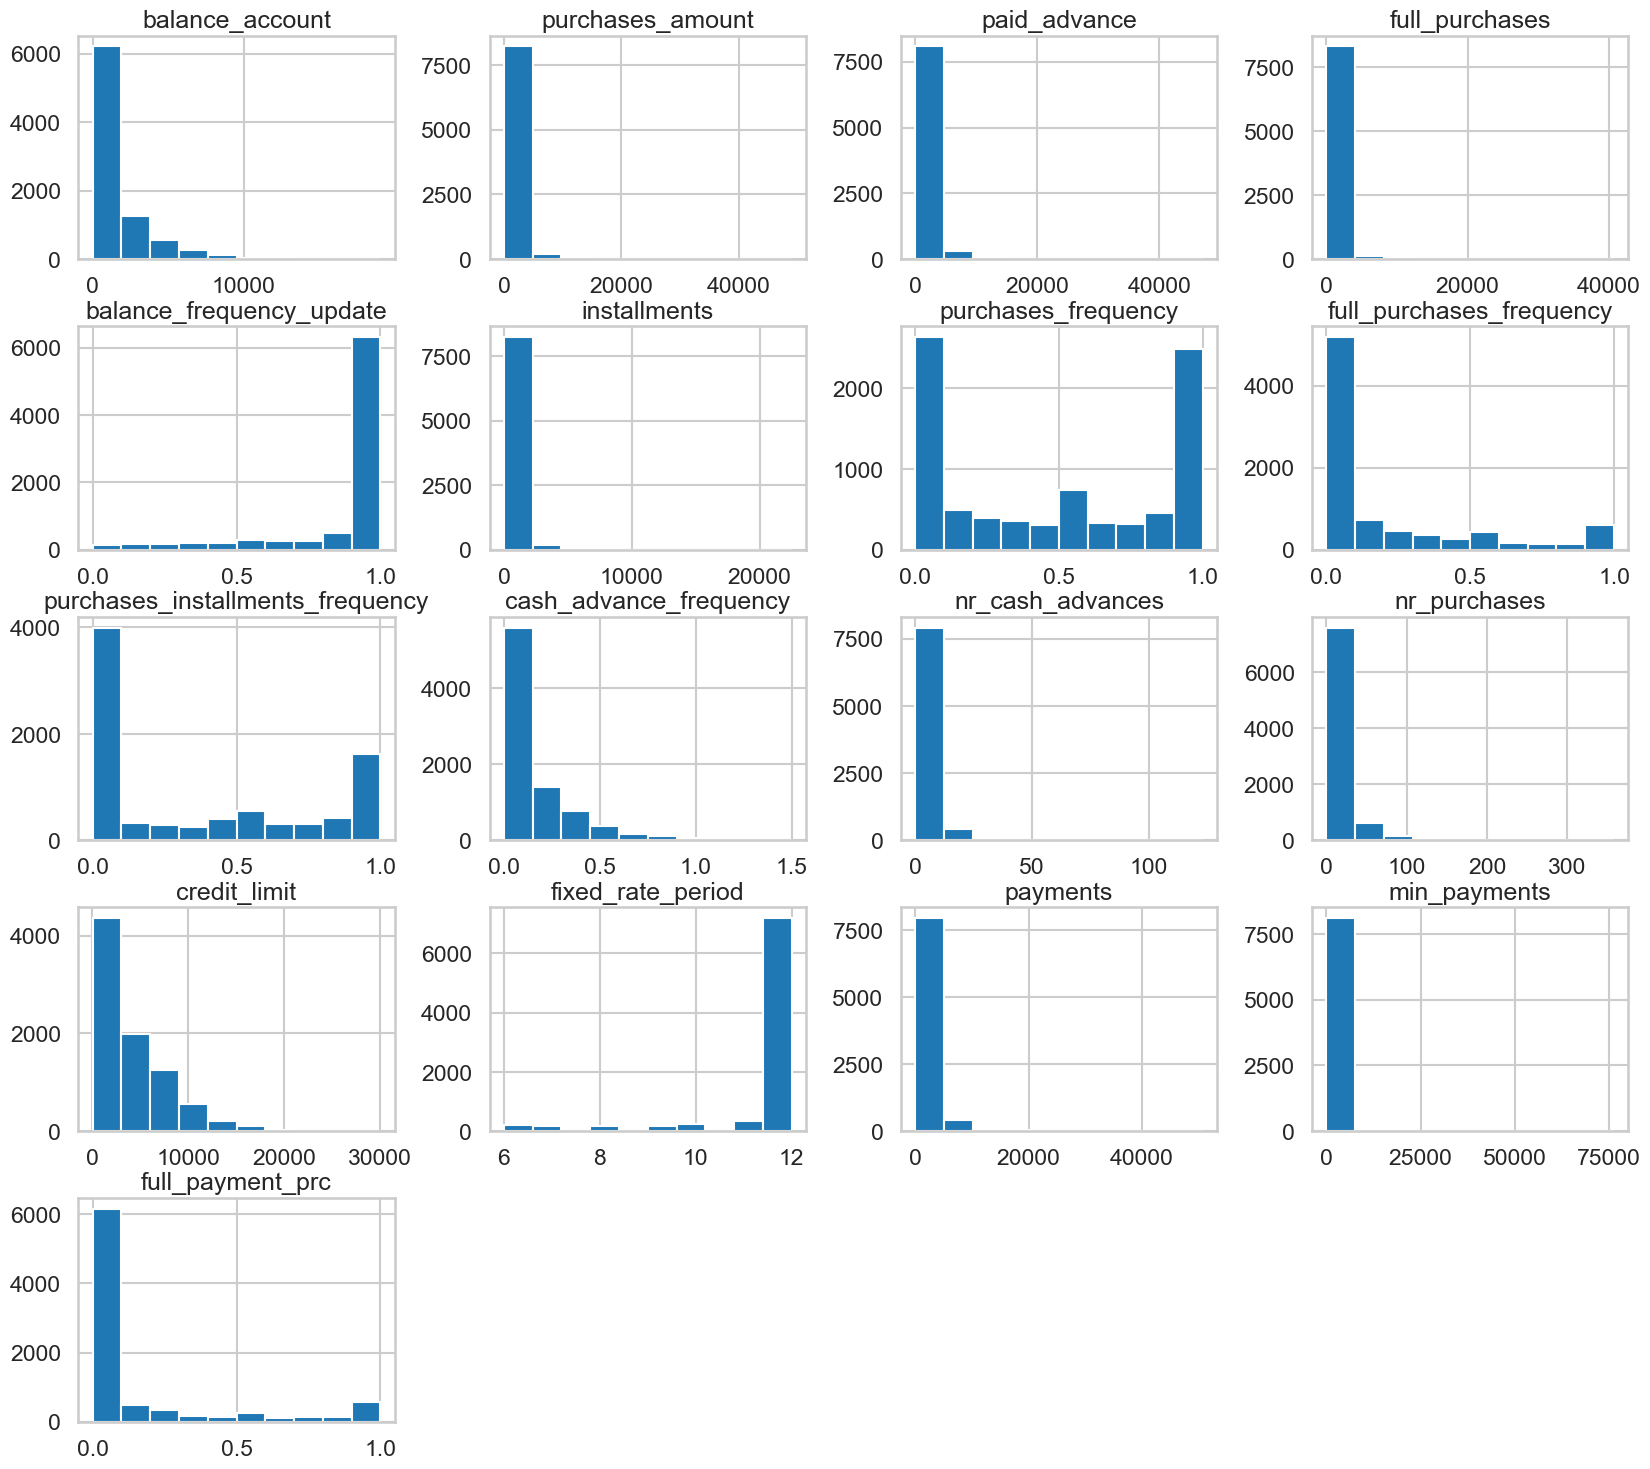

In [11]:
hist=transactions_df.hist(figsize=(20,18))

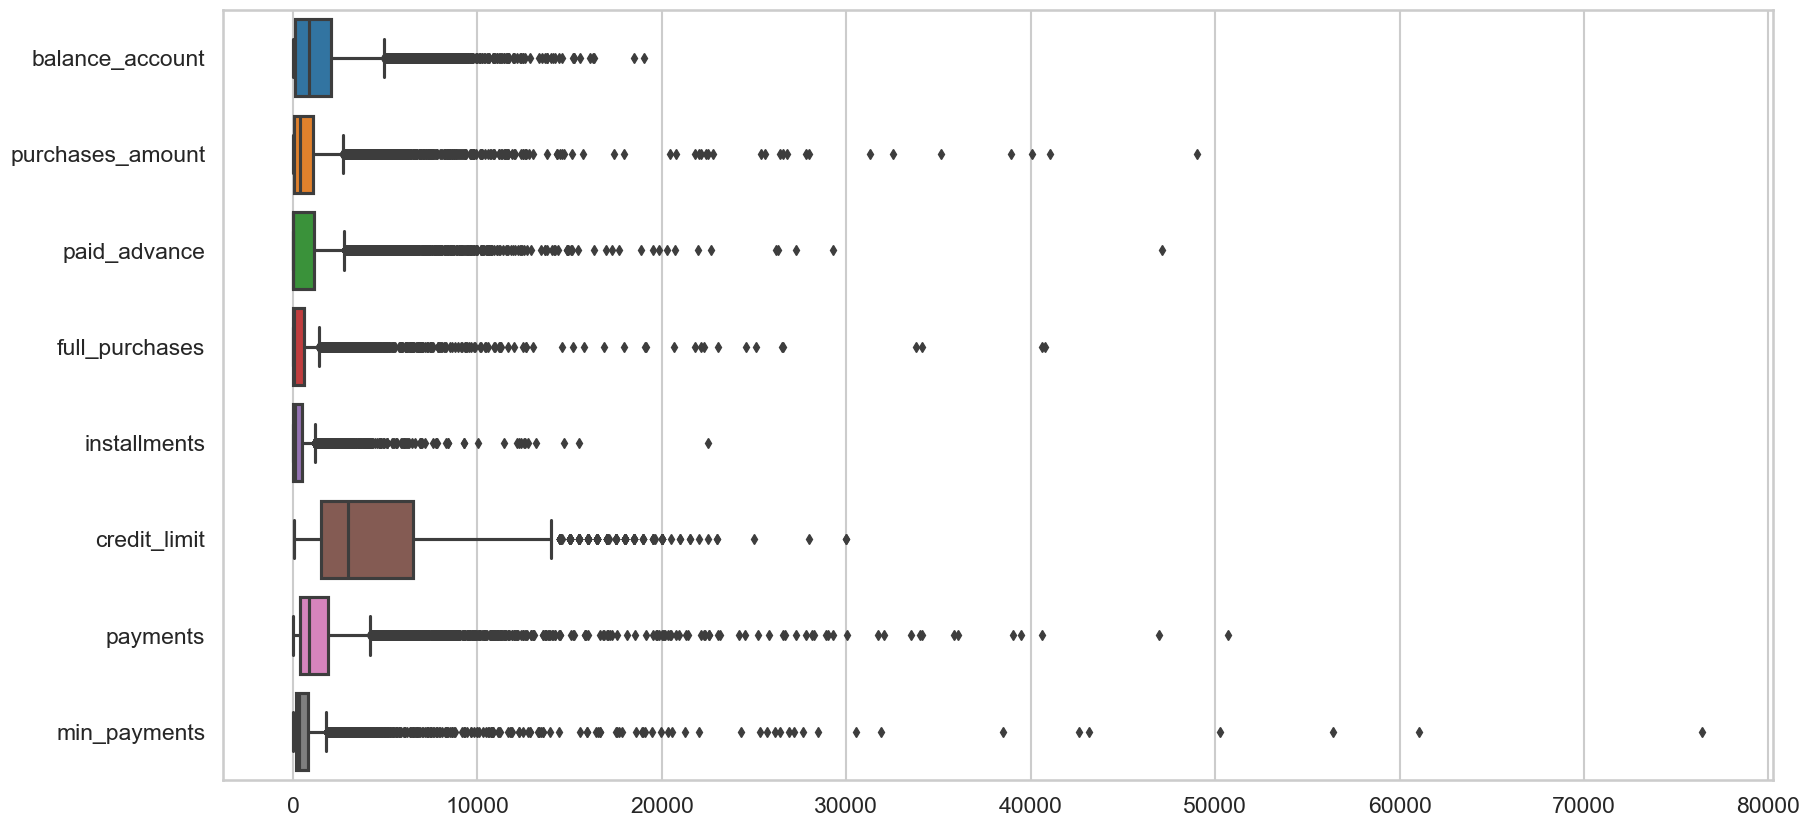

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(ax= ax, data=transactions_df.drop(columns=["customer_id", "balance_frequency_update", "purchases_installments_frequency", "purchases_frequency","full_purchases_frequency","nr_purchases", "cash_advance_frequency", "nr_cash_advances", "fixed_rate_period", "full_payment_prc"]), orient="h");

In [13]:
#divide dataframe to frequencies and small numbers from money amounts, exclude id 
transactions_frequecies_df=transactions_df[["balance_frequency_update", "purchases_installments_frequency",
                                    "purchases_frequency","full_purchases_frequency","nr_purchases", 
                                    "cash_advance_frequency", "nr_cash_advances", "fixed_rate_period","full_payment_prc"]]

transaction_amounts_df= transactions_df.drop(columns=["customer_id", "balance_frequency_update", "purchases_installments_frequency",
                                                  "purchases_frequency","full_purchases_frequency",
                                                 "cash_advance_frequency", "fixed_rate_period", 
                                                   "full_payment_prc"])



In [14]:
#all very close to 0, lots of outliers, scale amounts to see better:
scaler = StandardScaler()
transaction_amounts_sc_df = pd.DataFrame(scaler.fit_transform(transaction_amounts_df), columns=transaction_amounts_df.columns)

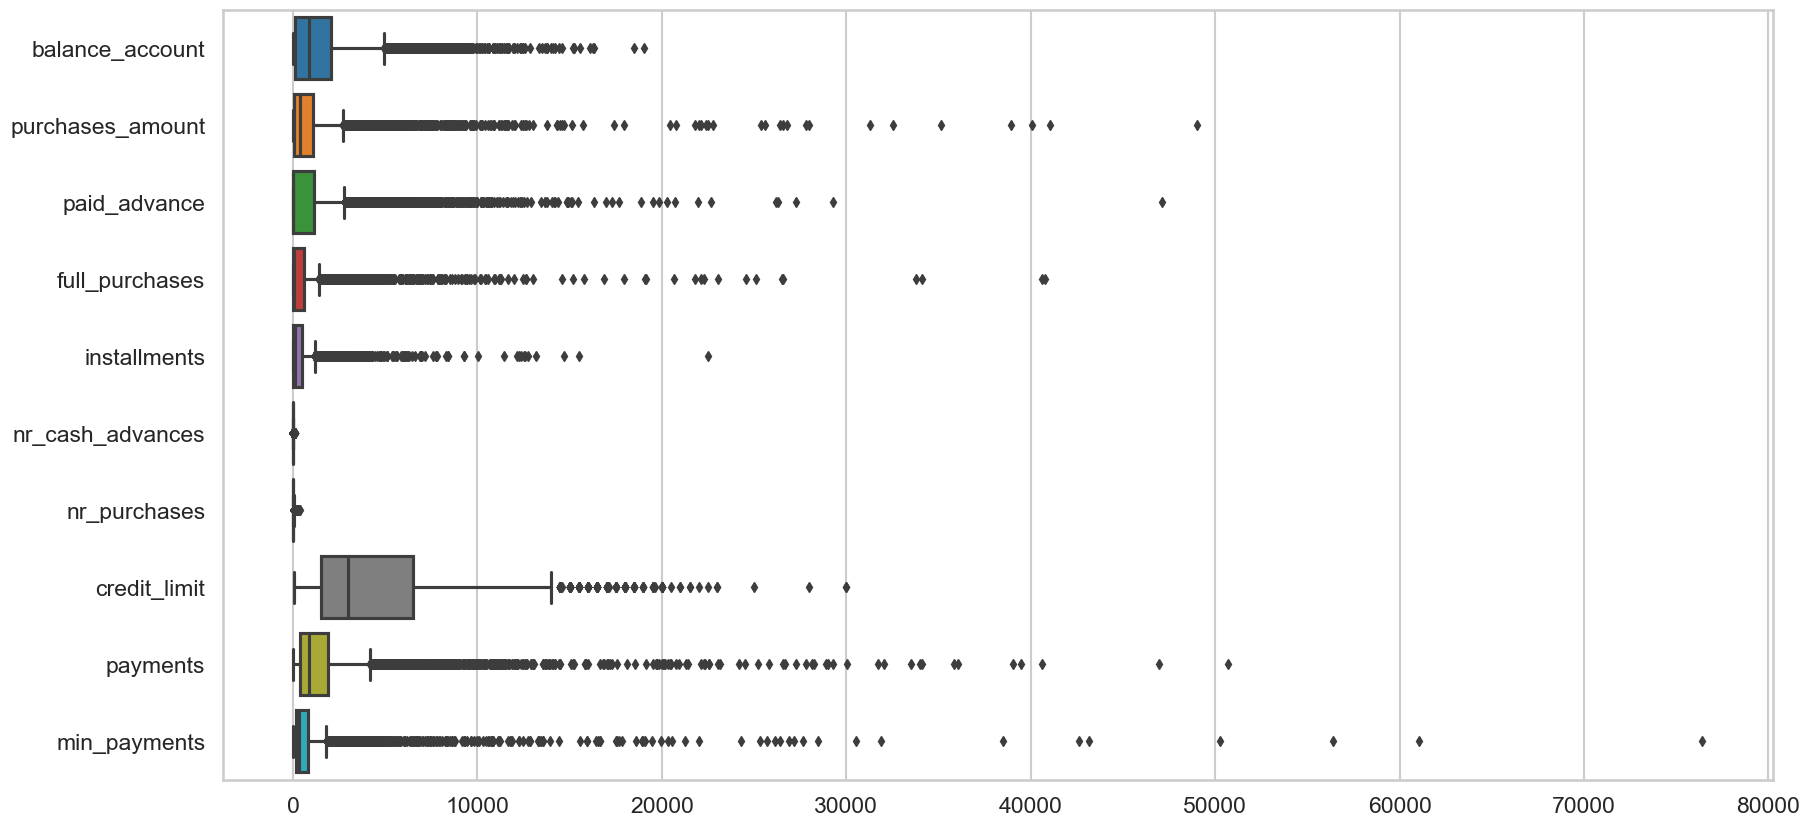

In [15]:

fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(ax= ax, data=transaction_amounts_df, orient="h");

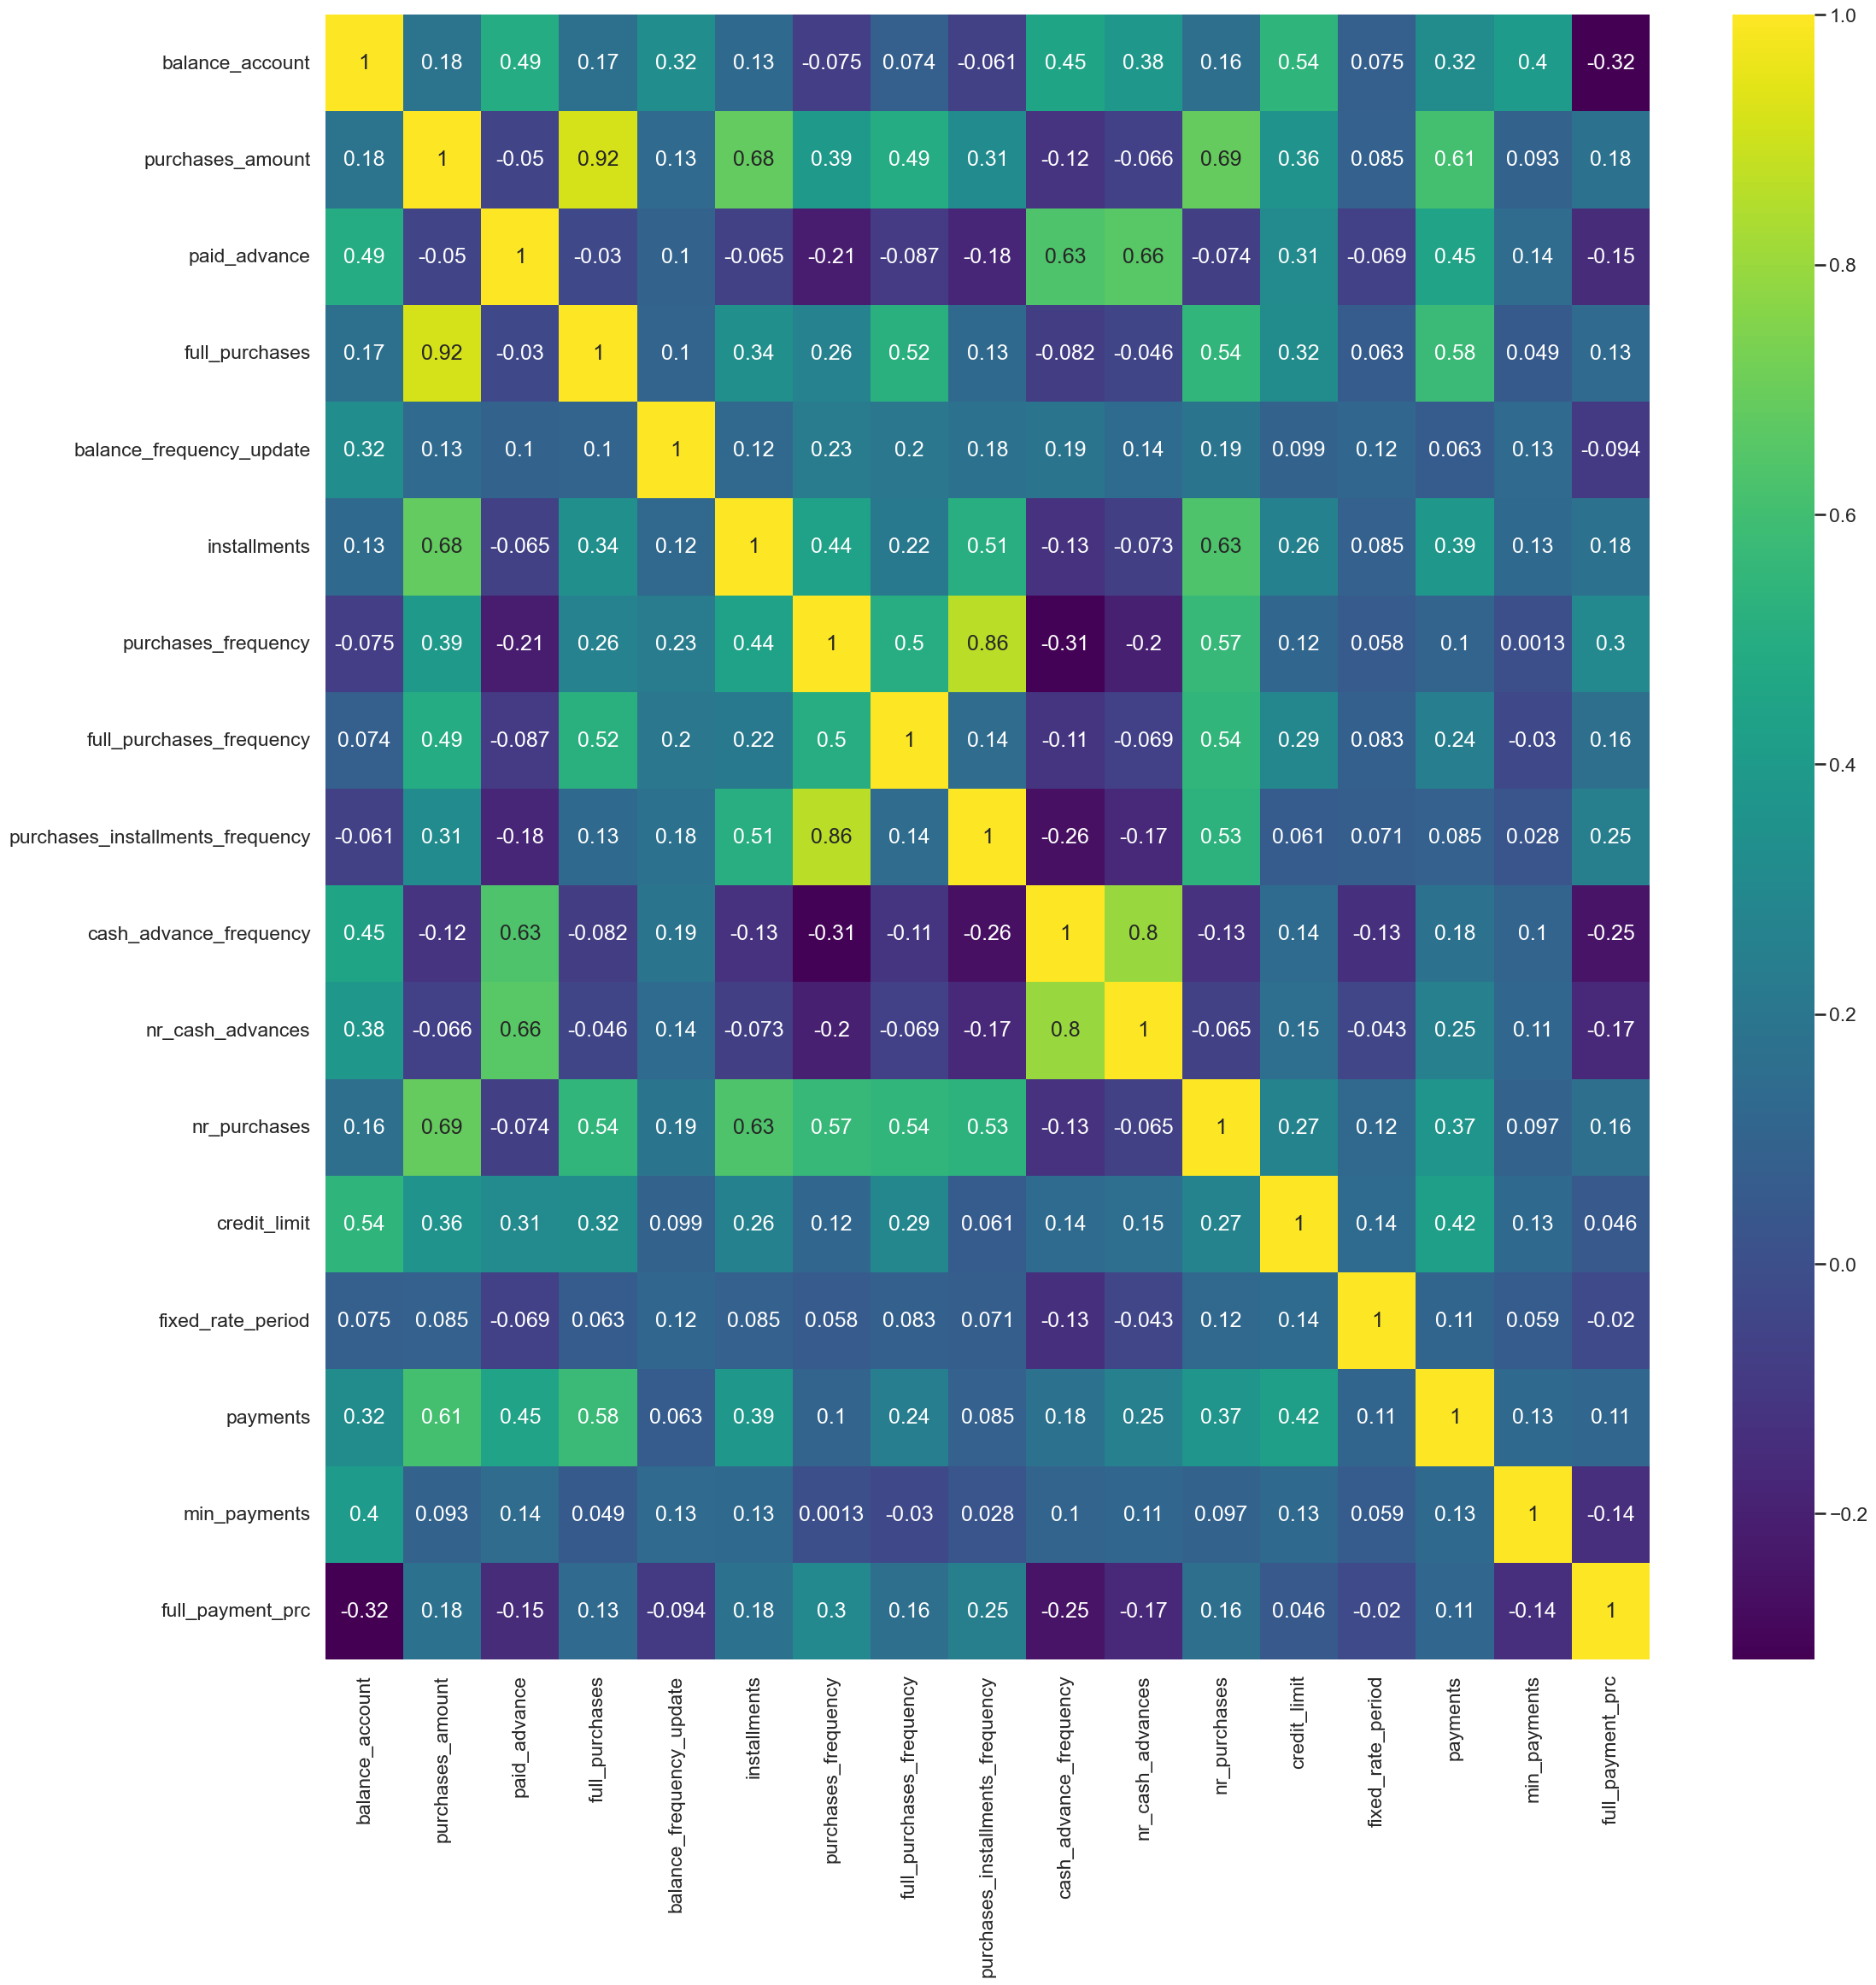

In [16]:
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(transactions_df.drop(columns=["customer_id"]).corr(), annot=True, cmap = 'viridis');

## Data cleaning

Until Christian comes up with a method to rid the na from min_payments column, I decided to drop the rows 
for the clustering, I am also dropping one row of data from credit limit that has na value as well as the "customer_id"

In [17]:
transactions_df_clean=transactions_df.dropna(axis=0)

In [18]:
transactions_df_clean=transactions_df_clean.drop(columns=["customer_id"])

In [19]:
transactions_df_clean.isnull().sum()

balance_account                     0
purchases_amount                    0
paid_advance                        0
full_purchases                      0
balance_frequency_update            0
installments                        0
purchases_frequency                 0
full_purchases_frequency            0
purchases_installments_frequency    0
cash_advance_frequency              0
nr_cash_advances                    0
nr_purchases                        0
credit_limit                        0
fixed_rate_period                   0
payments                            0
min_payments                        0
full_payment_prc                    0
dtype: int64

## k-means
### find number of K

In [20]:
cluster_errors = []

for n_clusters in range(2, 11):
    kmeans_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("cluster", KMeans(n_clusters=n_clusters, random_state=42, verbose=0))])
    kmeans_pipeline.fit(transactions_df_clean)
    kmeans_pipeline.predict(transactions_df_clean)
    cluster_errors.append(kmeans_pipeline.named_steps["cluster"].inertia_)#.inertia_, a kmeans build in function to 
                                    #calculate the sum squared distances of samples to their closest cluster centers

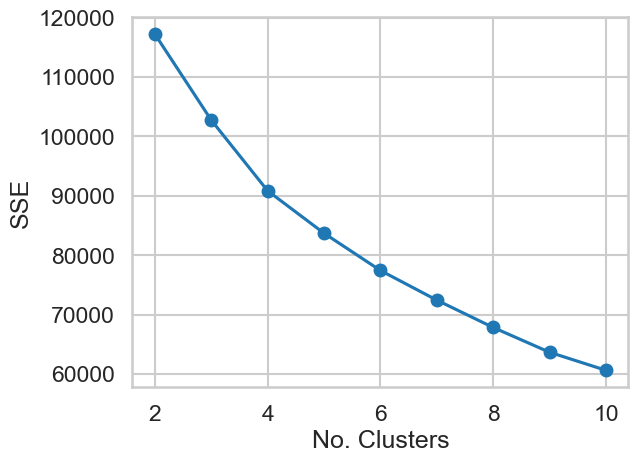

In [21]:
plt.plot(range(2, 11), cluster_errors, "o-")
plt.xlabel("No. Clusters")
plt.ylabel("SSE")
plt.show()#based on this diagram I would choose 3 or 4 clusters.

For n_clusters = 2 The average silhouette_score is : 0.0705
For n_clusters = 3 The average silhouette_score is : 0.339
For n_clusters = 4 The average silhouette_score is : 0.0551
For n_clusters = 5 The average silhouette_score is : 0.0056
For n_clusters = 6 The average silhouette_score is : 0.0049
For n_clusters = 7 The average silhouette_score is : 0.0044
For n_clusters = 8 The average silhouette_score is : -0.0576
For n_clusters = 9 The average silhouette_score is : -0.0466
For n_clusters = 10 The average silhouette_score is : -0.0403


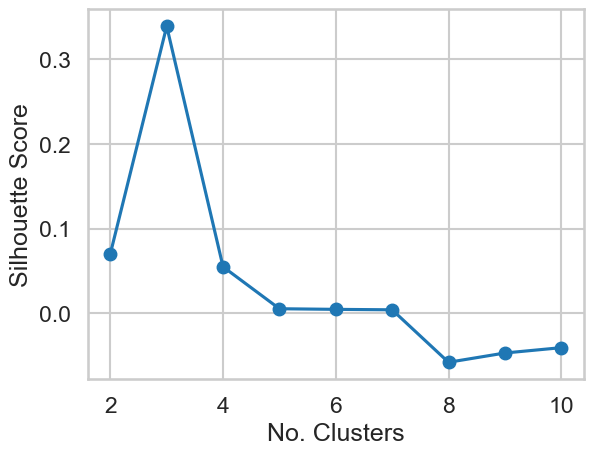

In [22]:
silhouette_s = []

for n_clusters in range(2, 11):
    kmeans_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("cluster", KMeans(n_clusters=n_clusters))])
    
    cluster_labels = kmeans_pipeline.fit_predict(transactions_df_clean)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_score(transactions_df_clean, cluster_labels).round(4))
    silhouette_s.append(silhouette_score(transactions_df_clean, cluster_labels))
    
plt.plot(range(2, 11),silhouette_s, "o-")
plt.xlabel("No. Clusters")
plt.ylabel("Silhouette Score")
plt.show()

### apply k-means

According to the above will choose k=3

In [23]:
kmeans_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("cluster", KMeans(n_clusters=3, random_state=42, verbose=0))])

# kmeans_pipeline.fit(df)
clusters = kmeans_pipeline.fit_predict(transactions_df_clean)
transactions_df_clean['Cluster'] = clusters
transactions_df_clean.head()

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc,Cluster
0,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571,0
1,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000,0
2,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000,0
3,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000,0
4,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000,0


In [25]:
transactions_df_clean["Cluster"].value_counts() #most clients are clustered in cluster 0, the rest are clustered in 2 and 1

0    5588
2    1470
1    1143
Name: Cluster, dtype: int64

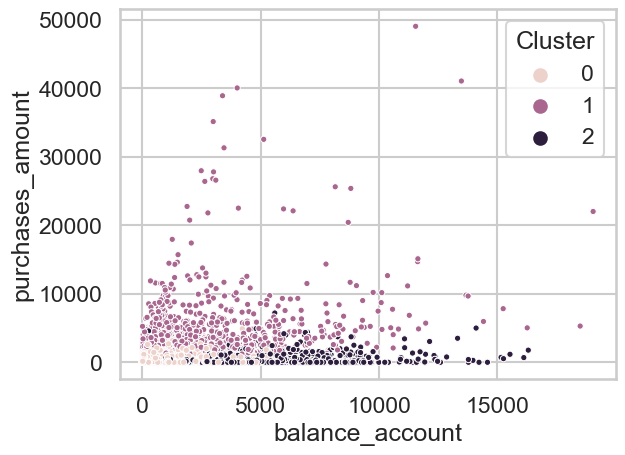

In [26]:
sns.scatterplot(x=transactions_df_clean['balance_account'], y=transactions_df_clean['purchases_amount'], 
                hue=transactions_df_clean['Cluster'], marker=".");

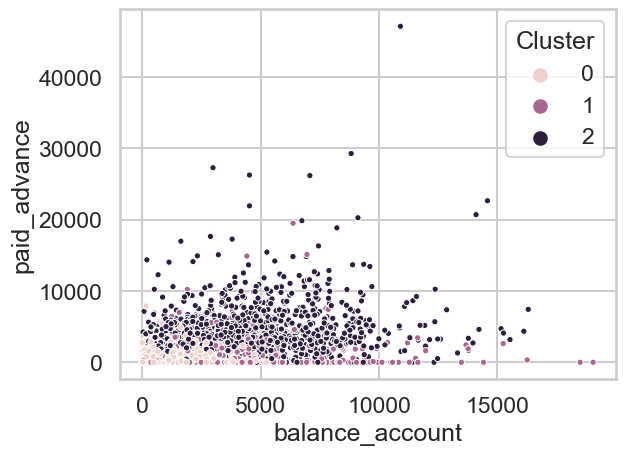

In [27]:
sns.scatterplot(x=transactions_df_clean['balance_account'], y=transactions_df_clean['paid_advance'], 
                hue=transactions_df_clean['Cluster'], marker=".");

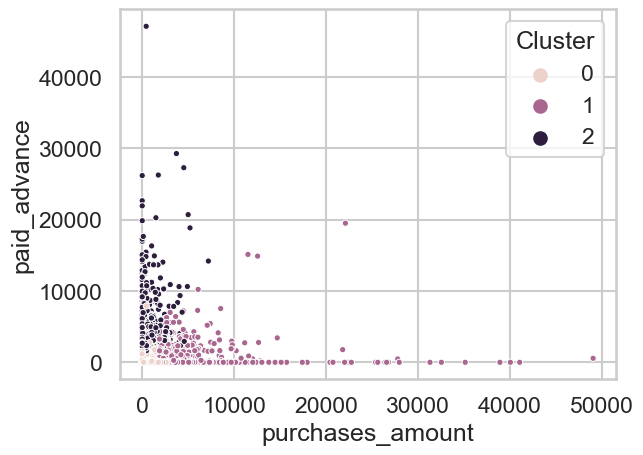

In [28]:
sns.scatterplot(x=transactions_df_clean['purchases_amount'], y=transactions_df_clean['paid_advance'], 
                hue=transactions_df_clean['Cluster'], marker=".");

In [29]:
transactions_df_clean.columns

Index(['balance_account', 'purchases_amount', 'paid_advance', 'full_purchases',
       'balance_frequency_update', 'installments', 'purchases_frequency',
       'full_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'nr_cash_advances', 'nr_purchases',
       'credit_limit', 'fixed_rate_period', 'payments', 'min_payments',
       'full_payment_prc', 'Cluster'],
      dtype='object')

In [30]:
transactions_df_clean.dtypes

balance_account                     float64
purchases_amount                    float64
paid_advance                        float64
full_purchases                      float64
balance_frequency_update            float64
installments                        float64
purchases_frequency                 float64
full_purchases_frequency            float64
purchases_installments_frequency    float64
cash_advance_frequency              float64
nr_cash_advances                      int64
nr_purchases                          int64
credit_limit                        float64
fixed_rate_period                     int64
payments                            float64
min_payments                        float64
full_payment_prc                    float64
Cluster                               int32
dtype: object

In [31]:
#sns.pairplot(transactions_df_clean, vars=transactions_df_clean[['balance_account','full_purchases', 'installments',
                                                                'nr_purchases', 'payments', 'full_payment_prc', 
                                                                 'purchases_frequency','nr_cash_advances','credit_limit']], hue='Cluster', height=8);

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f880b85c670> (for post_execute):


KeyboardInterrupt: 

In [ ]:
trunk_df=transactions_df_clean.sample(n=2000)

In [ ]:
#fig, ax = plt.subplots(figsize=(25, 25))
#sns.pairplot(trunk_df, hue='Cluster')

#sns.pairplot(trunk_df, hue='Cluster', corner=True, height=20)

### apply k-means with DJ's tip
'Also one more thing, from a K-means implementation perspective as we know there is not 1 unique clustering solution in most cases as it depends on the centroid initialization so use the following (also there in the live coding) to try more initializations and run for more iterations to get clusters which don't fluctuate too much if you run \ evaluate the models multiple times.'

In [32]:
kmeans_pipeline = Pipeline([ ## before running this be sure to re-run the cleaning part as it may be overwrittern by the previous k-means
        ("scaler", StandardScaler()),
        ("cluster", KMeans(n_clusters=3, random_state=42, verbose=0, n_init=1000, max_iter=10000))])

# kmeans_pipeline.fit(df)
clusters = kmeans_pipeline.fit_predict(transactions_df_clean)
transactions_df_clean['Cluster'] = clusters
transactions_df_clean.head()

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc,Cluster
0,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571,0
1,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000,0
2,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000,0
3,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000,0
4,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000,0


In [33]:
#plt2=sns.pairplot(transactions_df_clean, vars=transactions_df_clean[['balance_account','full_purchases', 'installments',
                                                                'nr_purchases', 'payments', 'full_payment_prc', 
                                                                 'purchases_frequency','nr_cash_advances' ]], hue='Cluster', height=8);

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f880b85c670> (for post_execute):


KeyboardInterrupt: 

In [35]:
transactions_df_clean["Cluster"].value_counts() #counts from k-means with no n_init=1000, max_iter=10000:
#0    5588
#2    1470
#1    1143 very few changed cluster 

0    5588
2    1470
1    1143
Name: Cluster, dtype: int64

In [36]:
plt2.show()

NameError: name 'plt2' is not defined

## Apply dimentionsionality reduction with tsne


## EDA

perform descriptive stats for each method: k-means alone, and dimentionality reduction by t-SNE, followed by k-means

DF NAMES:

k-means alone: transactions_df_clean 
t-SNE+ K-means: trans_dim_red_df

### working on the t-SNE+ K-means: trans_dim_red_df dataset

In [ ]:
#balance_df=amounts_df.groupby(["Cluster"]).balance_account.mean()

In [ ]:
#balance_df.head()

In [ ]:
#installments_df=amounts_df.groupby(["Cluster"]).installments.mean()

In [ ]:
#installments_df.head()

In [ ]:
#fig, ax = plt.subplots(figsize=(8, 6))

#installments_df.plot(kind='bar', ax=ax)
#x.legend(bbox_to_anchor=(1.02, 1.02), fontsize='large')
#plt.xlabel('installment mean')
#plt.xticks(rotation=0)
#plt.ylabel('installments')
#plt.title('Installment average by client segment');

In [ ]:
#fig, ax = plt.subplots(figsize=(8, 6))

#installments_df.plot(kind='bar', ax=ax)
#ax.legend(bbox_to_anchor=(1.02, 1.02), fontsize='large')
#plt.xlabel('installment mean')
#plt.xticks(rotation=0)
#plt.ylabel('installments')
#plt.title('Installment average by client segment');


In [ ]:
#installments_df_2=amounts_df.groupby(["Cluster"]).installments.mean()

In [ ]:
#installments_df=amounts_df.groupby(["Cluster","installments" ]).installments.count()

## Working on data after PCA and k-means


In [39]:
data_df= pd.read_csv("../data/card_trans_pca_clusters.csv")

In [40]:
data_df.clusters.value_counts()

0    5791
1    1591
2    1117
Name: clusters, dtype: int64

### Analysis of cluster 2

In [41]:
cluster_0=data_df[data_df.clusters== 0]

In [42]:
cluster_1=data_df[data_df.clusters== 1]

In [43]:
cluster_2=data_df[data_df.clusters== 2]

In [44]:
cluster_2.shape

(1117, 19)

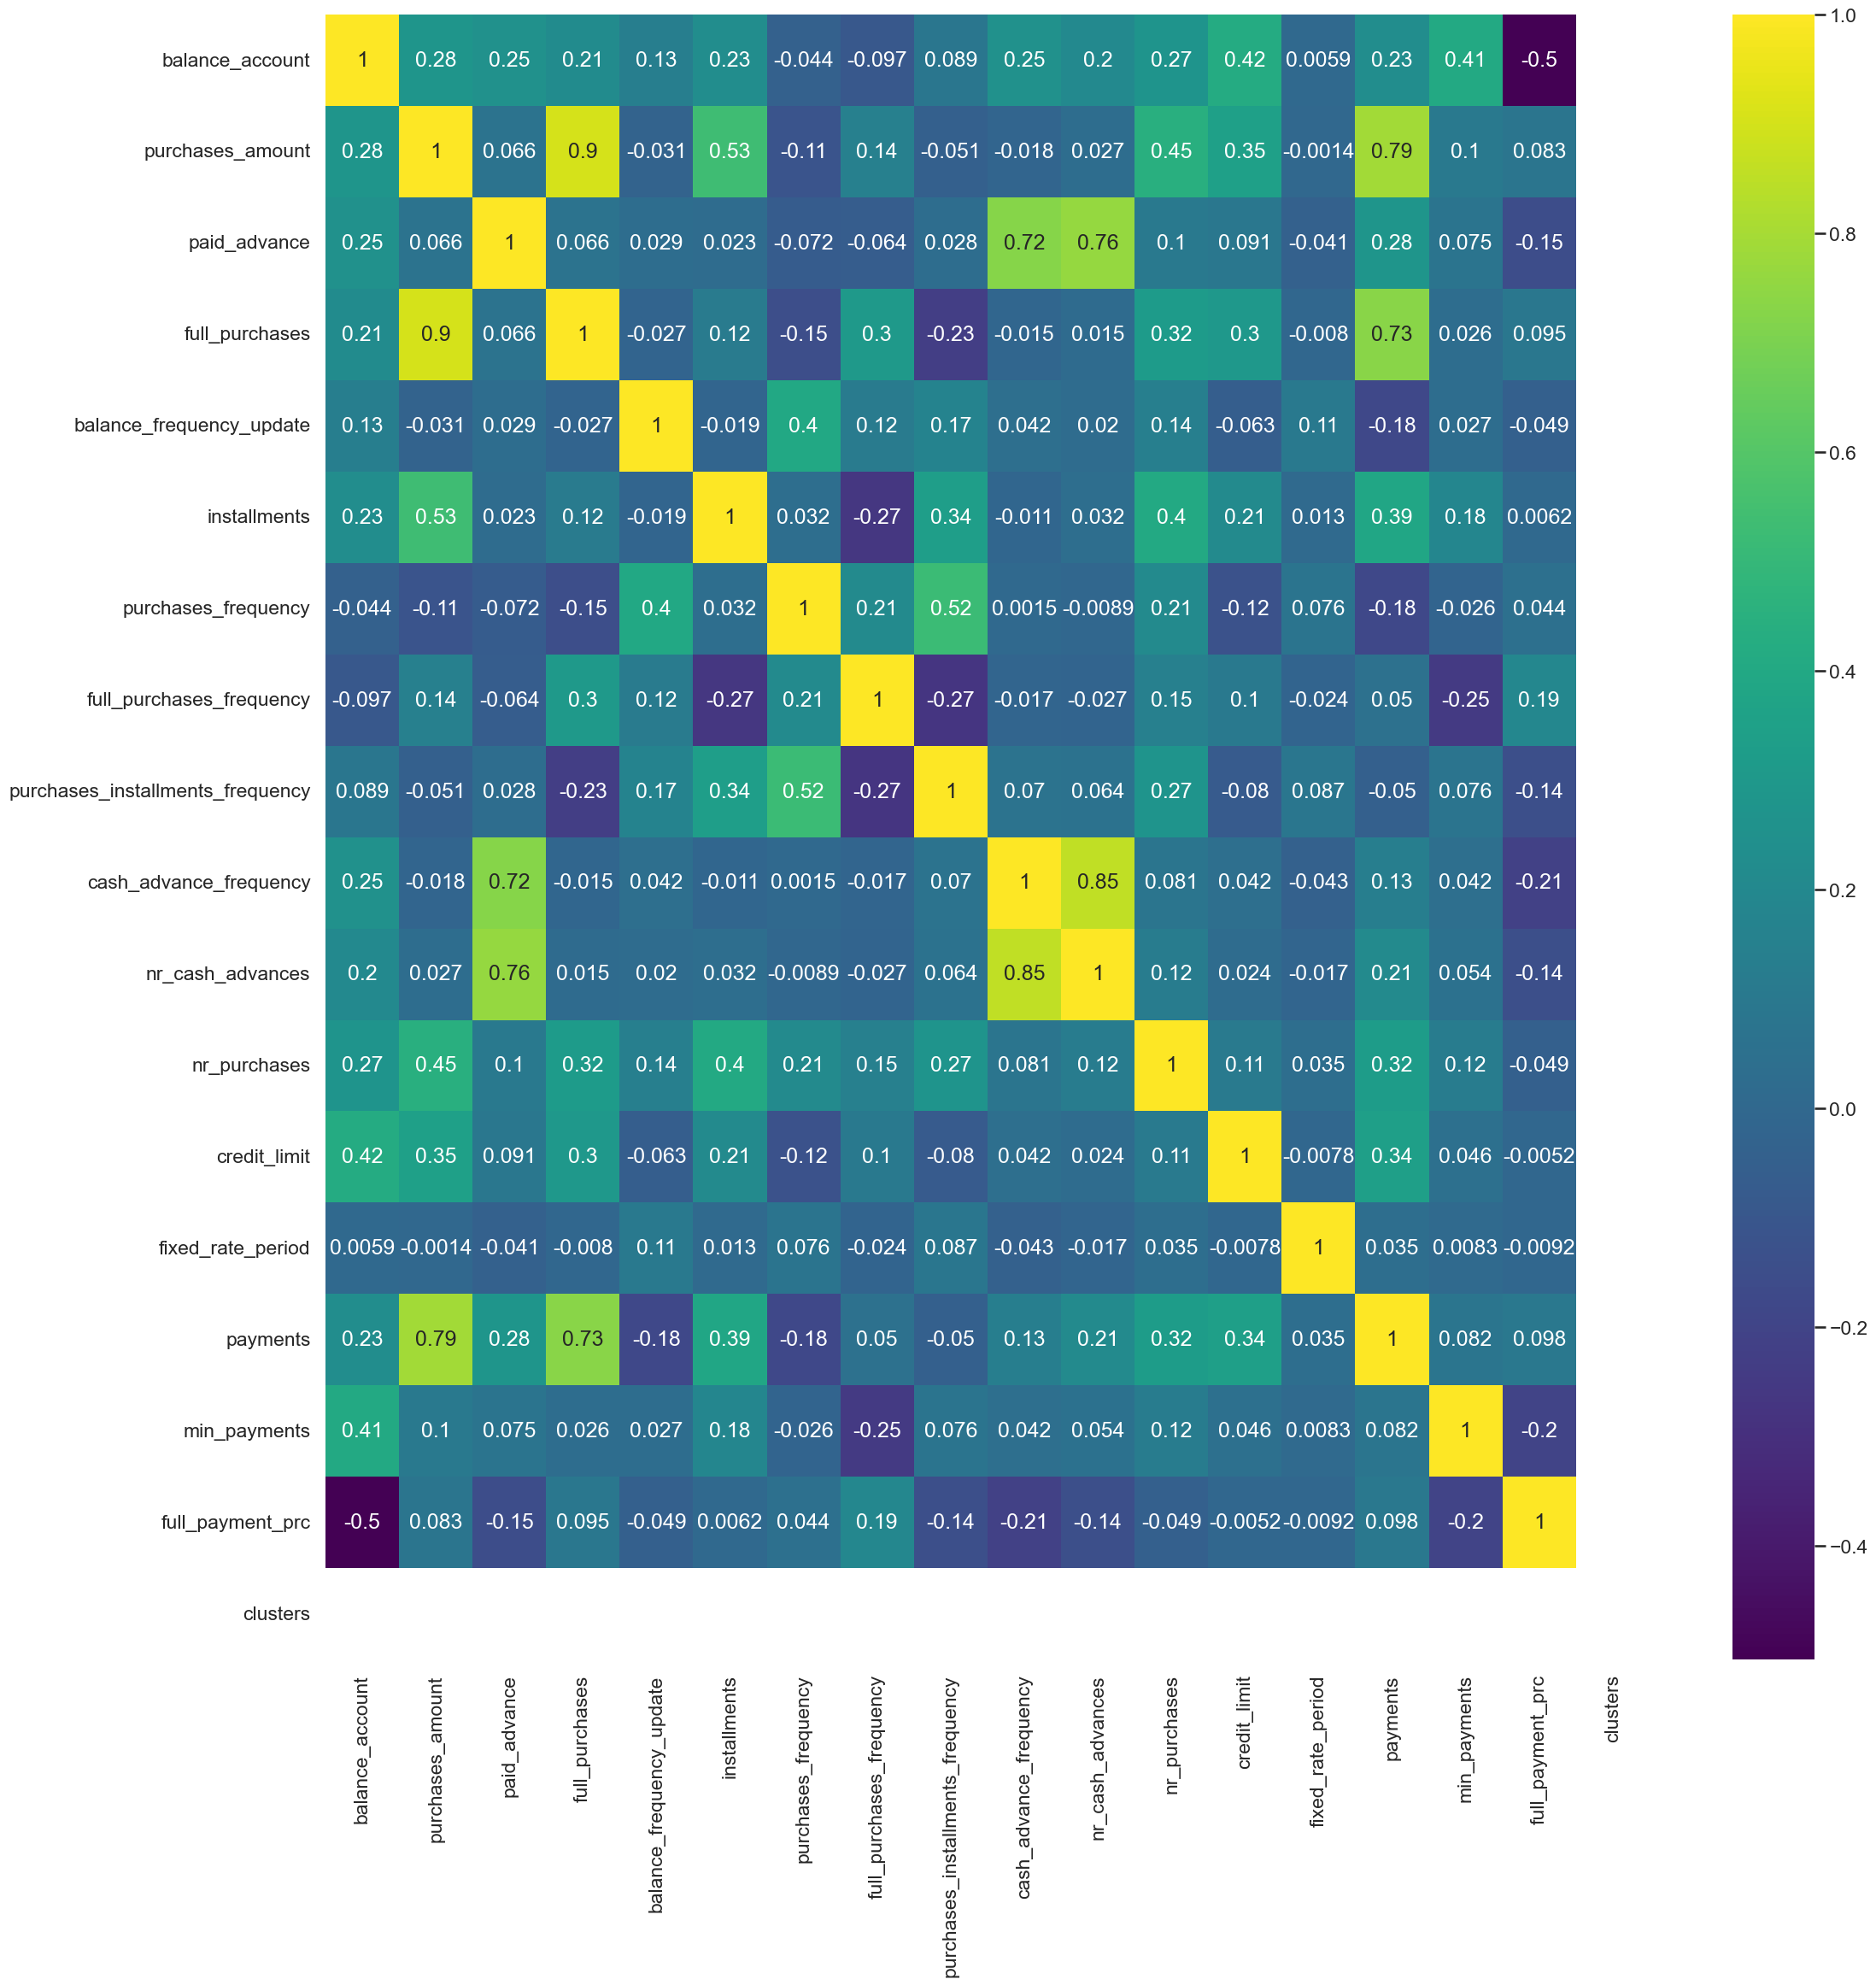

In [45]:
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(cluster_2.drop(columns=["customer_id"]).corr(), annot=True, cmap = 'viridis');

In [46]:
cluster_2.columns

Index(['customer_id', 'balance_account', 'purchases_amount', 'paid_advance',
       'full_purchases', 'balance_frequency_update', 'installments',
       'purchases_frequency', 'full_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'nr_cash_advances', 'nr_purchases', 'credit_limit', 'fixed_rate_period',
       'payments', 'min_payments', 'full_payment_prc', 'clusters'],
      dtype='object')

In [ ]:


#sns.pairplot(cluster_2, vars=cluster_2[['balance_account','full_purchases', 'installments',
#                                                                'nr_purchases', 'paid_advance', 'purchases_amount', 'credit_limit',
 #                                                                'min_payments','payments','nr_cash_advances' ]], height=5, kind="hist");

In [47]:
data_df.shape

(8499, 19)

In [64]:
#rename clusters to cluster names
data_df['clusters'] = np.where(data_df['clusters'] == 0, "Strugglers", data_df['clusters'])
data_df['clusters'] = np.where(data_df['clusters'] == 2, "Frequent spenders", data_df['clusters'])
data_df['clusters'] = np.where(data_df['clusters'] == 1, "Convenience lovers", data_df['clusters'])

In [65]:
data_df.clusters.unique()


array(['Strugglers', 'Convenience lovers', 'Frequent spenders'],
      dtype=object)

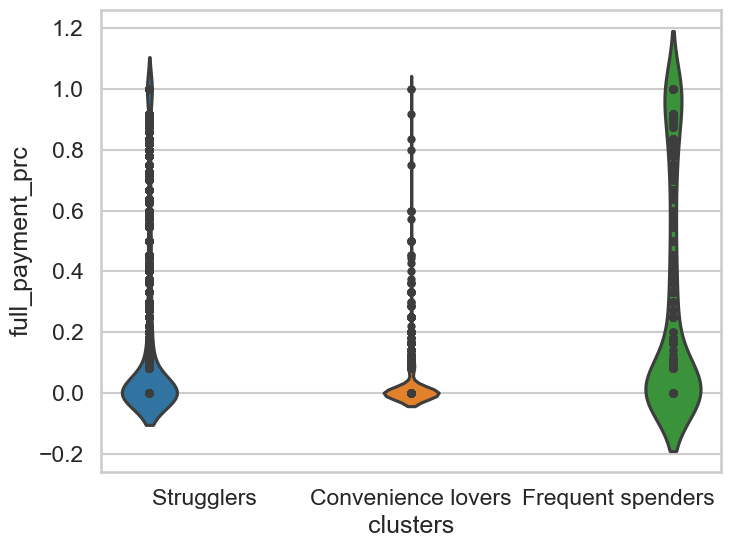

In [66]:
fig, ax = plt.subplots(figsize=(8, 6))
ax=sns.violinplot(data=data_df, x="clusters", y="full_payment_prc", hue="clusters", inner="points")#, scale="width")
ax.legend_.remove() #in cluster 2 data is more sread than other 2 clusters and the median is higher than 0

#plt.savefig('full_payment_prc.png', bbox_inches="tight")

In [68]:
data_df[data_df.clusters=="Frequent spenders"].full_payment_prc.describe()

count    1117.000000
mean        0.298475
std         0.385161
min         0.000000
25%         0.000000
50%         0.083333
75%         0.666667
max         1.000000
Name: full_payment_prc, dtype: float64

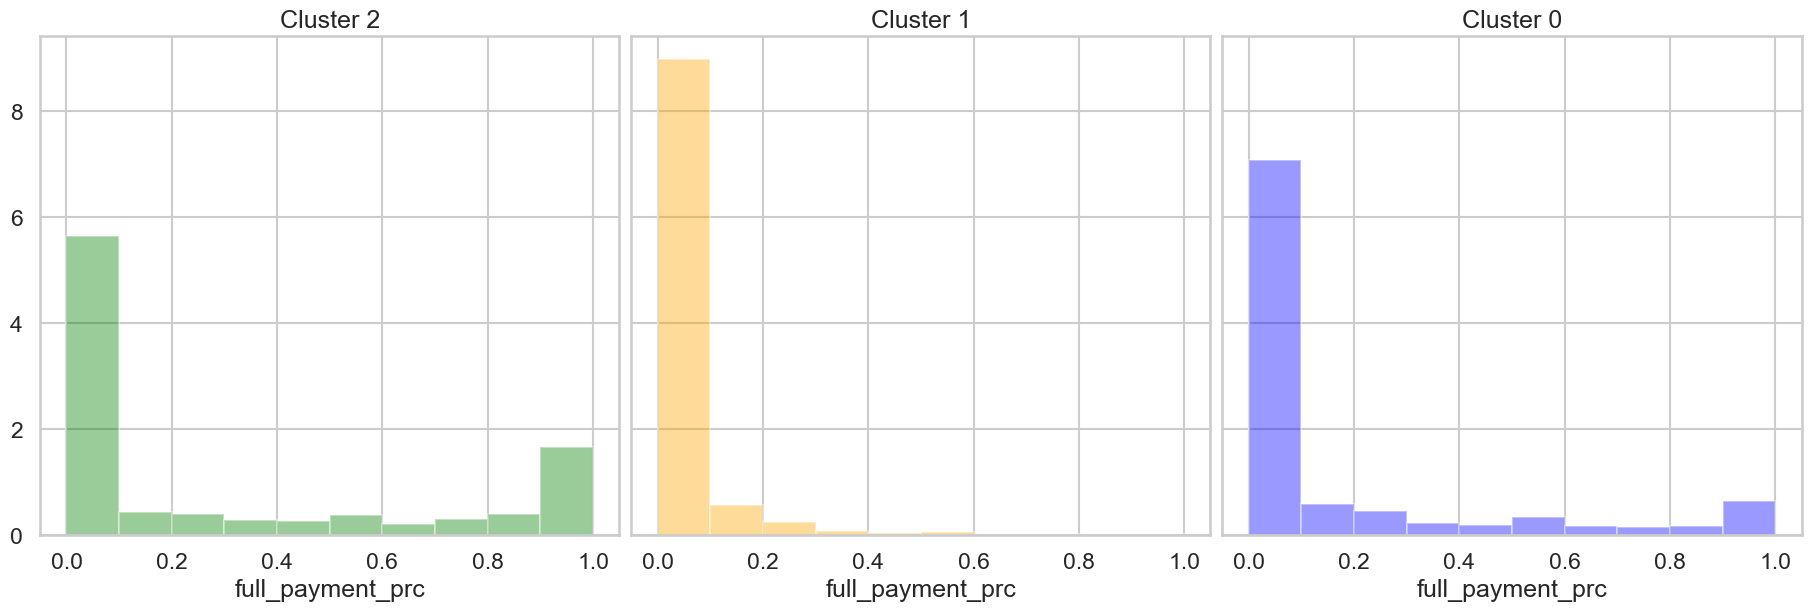

In [69]:

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18,6), sharex=True, sharey=True, constrained_layout=True)
sns.distplot(cluster_2['full_payment_prc'], ax= axs[0], color="green", kde=False, bins=10, norm_hist=True)
axs[0].set_title('Cluster 2')
sns.distplot(cluster_1['full_payment_prc'], ax= axs[1], color="orange", kde=False, bins=10, norm_hist=True)
axs[1].set_title('Cluster 1')
sns.distplot(cluster_0['full_payment_prc'], ax= axs[2], color="blue", kde=False, bins=10, norm_hist=True)
axs[2].set_title('Cluster 0')
plt.savefig('full_payment_prc.png', bbox_inches="tight")

# plt.setp(axs[0].get_xticklabels(), rotation=90)
# plt.setp(axs[1].get_xticklabels(), rotation=90)
# plt.setp(axs[2].get_xticklabels(), rotation=90)


In [ ]:
sns.violinplot(data=data_df, x="clusters", y="nr_cash_advances", hue="clusters");# very concentrated at 0 
plt.yscale('log')
plt.ylim(10**-3)

In [ ]:
data_df.columns

In [94]:
sns.set_context("talk", font_scale=1.2)

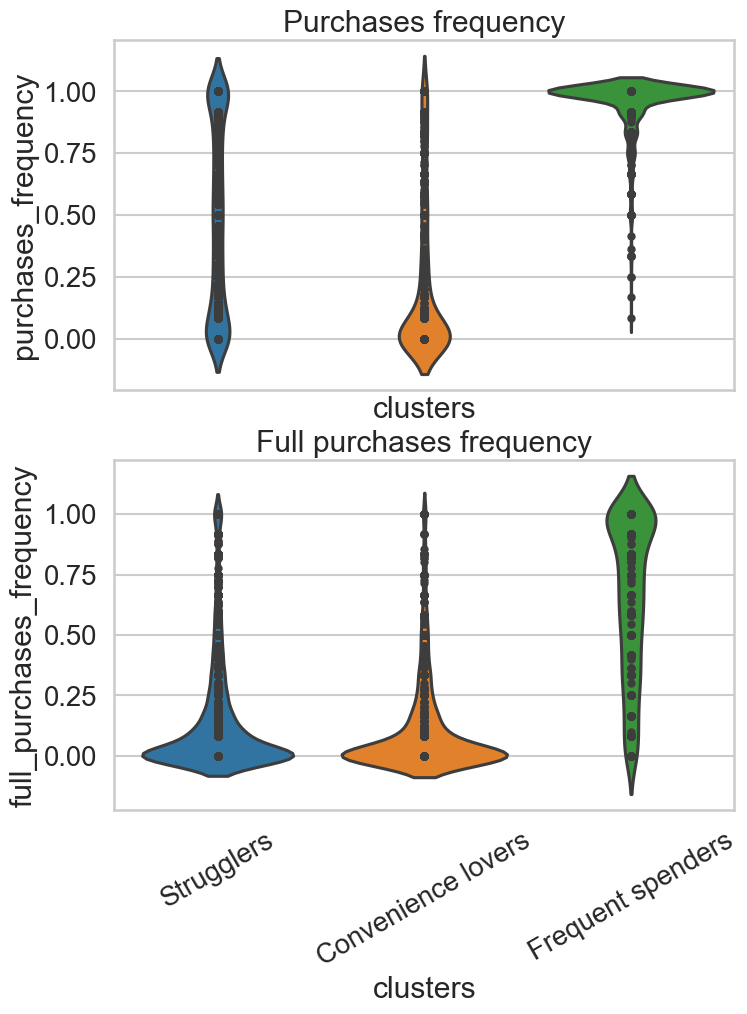

In [112]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 10), sharex=True)

sns.violinplot(ax= axs[0],data=data_df, x="clusters", y="purchases_frequency", inner="points").set_title("Purchases frequency")
sns.violinplot(ax=axs[1],data=data_df, x="clusters", y="full_purchases_frequency", inner="points").set_title("Full purchases frequency")




ax.set(xlabel=None)
ax.set(ylabel=None)




plt.setp(axs[1].get_xticklabels(), rotation=30)

plt.savefig("full_clustered_data.png", bbox_inches='tight')
plt.show()
#  this is the biggest difference so far: most data  concentrated betwee 0.4 and 1, while in other 2 clusters, they are concentrated between 0 and 0.16-0.18
#ax2.legend_.remove();
#plt.savefig('full_purchases_frequency', bbox_inches="tight")

AttributeError: 'NoneType' object has no attribute 'remove'

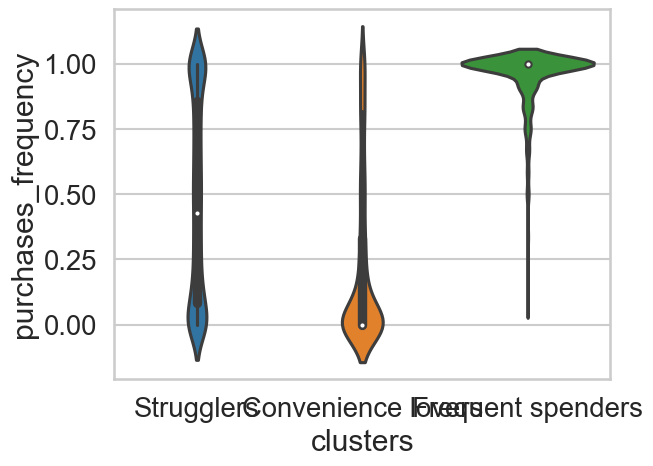

In [99]:
ax3=sns.violinplot(data=data_df, x="clusters", y="purchases_frequency")
#ax3.legend_.remove() #concentration at 1 


In [ ]:
ax4=sns.violinplot(data=data_df, x="clusters", y="paid_advance", hue="clusters")
ax4.legend_.remove() # concentrated around 0 similar to cluster 0 but different from cluster 1 
plt.yscale('log')
plt.ylim(-10, 10**5)

In [ ]:
ax5=sns.violinplot(data=data_df, x="clusters", y="purchases_amount", hue="clusters", inner="points")
ax5.legend_.remove()# This is the cluster that has the higherst amount of purchases compared to the other 2 clusters, they are the rich!

Text(0.5, 1.0, 'Installments')

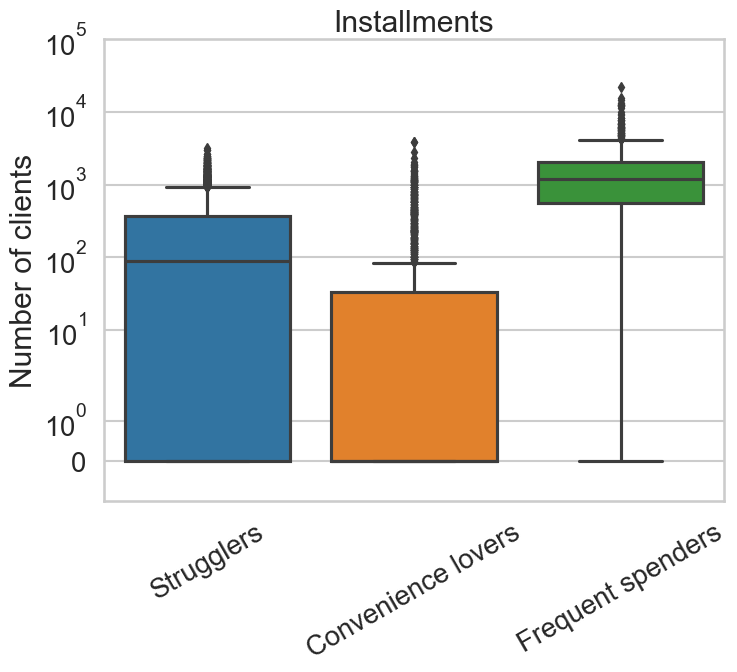

In [114]:
fig, ax = plt.subplots(figsize=(8, 6))

ax5=sns.boxplot(data=data_df, x="clusters", y="installments")
# ax5.legend_.remove()
plt.yscale('symlog')
plt.ylim(-1, 10**5);
#plt.savefig('purchases_amount.png', bbox_inches="tight")

plt.setp(ax5.get_xticklabels(), rotation=30)
ax.set(xlabel=None)
ax.set(ylabel="Number of clients")
plt.title("Installments")
# this waY I am losing the 0 values


In [ ]:
ax5=sns.violinplot(data=data_df, x="clusters", y="purchases_amount", hue="clusters", inner="points")
ax5.legend_.remove()
plt.ylim(-2000, 20000)

In [ ]:
data_df[data_df.clusters==2].purchases_amount.min()

In [ ]:
#plot this in a different way,eg, scatterplot

In [ ]:
data_df[data_df.clusters==2].describe()

In [ ]:
stats

In [ ]:
data_df.columns

In [ ]:
ax5=sns.boxplot(data=data_df, x="clusters", y="paid_advance")#, hue="clusters", inner="points", cut=True)
#ax5.legend_.remove()
plt.yscale('symlog')
plt.ylim(-1, 10**5)
#plt.savefig()

### work on all 3 clusters

In [ ]:
scaler = StandardScaler() # Scaling the data so the plot makes sense once it is ploted
cluster_2_scaled = pd.DataFrame(scaler.fit_transform(cluster_2), columns=cluster_2.columns)
cluster_1_scaled=pd.DataFrame(scaler.fit_transform(cluster_1), columns=cluster_1.columns)
cluster_0_scaled=pd.DataFrame(scaler.fit_transform(cluster_0), columns=cluster_0.columns)

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(20, 20), sharex=True)

sns.boxplot(ax= axs[0], data=cluster_2_scaled).set_title('Cluster 2')
sns.boxplot(ax= axs[1], data=cluster_1_scaled ).set_title('Cluster 1')
sns.boxplot(ax= axs[2], data=cluster_0_scaled ).set_title('Cluster 0')



plt.setp(axs[2].get_xticklabels(), rotation=90)

plt.savefig("full_clustered_data.png", bbox_inches='tight')
plt.show()


In [ ]:
sample_data=data_df.sample(n=2000, random_state=42)

sns.pairplot(sample_data, vars=sample_data[['balance_account','full_purchases', 'installments',
                                                                'nr_purchases', 'payments', 'full_payment_prc', 
                                                                 'purchases_frequency','nr_cash_advances' ]], hue='clusters', height=8, corner=True);

In [ ]:
scaler = StandardScaler() # Scaling the data so the plot makes sense once it is ploted
cluster_1_scaled = pd.DataFrame(scaler.fit_transform(cluster_1), columns=cluster_1.columns)


fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(ax= ax, data=cluster_1_scaled, orient=("h"));


In [115]:
data_df.columns

Index(['customer_id', 'balance_account', 'purchases_amount', 'paid_advance',
       'full_purchases', 'balance_frequency_update', 'installments',
       'purchases_frequency', 'full_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'nr_cash_advances', 'nr_purchases', 'credit_limit', 'fixed_rate_period',
       'payments', 'min_payments', 'full_payment_prc', 'clusters'],
      dtype='object')

In [124]:
data_stat_plot=data_df[["credit_limit", "installments", "purchases_frequency", "paid_advance", "balance_account", "clusters"]].groupby(["clusters"]).median().reset_index()

In [136]:
data_stat_plot

,clusters,credit_limit,purchases_amount,nr_cash_advances,installments,paid_advance,balance_account
0,Convenience lovers,6000.0,0.00,10.0,0.00,2986.039891,3300.735817
1,Frequent spenders,7000.0,3220.09,0.0,1184.98,0.000000,1329.967543
2,Strugglers,2500.0,319.98,0.0,87.94,0.000000,394.423256


In [134]:
data_stat_plot=data_df.groupby(["clusters"]).median()[["credit_limit", "purchases_amount","nr_cash_advances", "installments",
                                        "paid_advance", "balance_account"]].reset_index()

In [ ]:
sns

In [121]:
data_stat_plot["installments"]=data_df.groupby(["clusters"]).installments.median()

In [122]:
data_stat_plot

,clusters,credit_limit,installments
0,Convenience lovers,6000.0,NaN
1,Frequent spenders,7000.0,NaN
2,Strugglers,2500.0,NaN
